# Understanding the Russell Data

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [3]:
# Load in the data files
daily_prices = pd.read_csv("russell_3k_updated/russell_3k_daily_prices.csv", index_col=0)

In [4]:
daily_prices.shape

(5705612, 8)

In [5]:
# Show all rows where the index is equal to 0 in daily_prices
daily_prices = daily_prices.loc[daily_prices.index < 1649]
daily_prices = daily_prices.loc[daily_prices.index > 2]
daily_prices

Price           Adj Close               Close                High  \
3     2015-06-22  26.611177444458008  28.259279251098633  28.595699310302734   
4     2015-06-23    26.5659236907959  28.211219787597656     28.427490234375   
5     2015-06-24    26.5659236907959  28.211219787597656  28.475549697875977   
6     2015-06-25  26.181238174438477  27.802709579467773  28.283309936523438   
7     2015-06-26  26.452777862548828    28.0910701751709  28.259279251098633   
...          ...                 ...                 ...                 ...   
1644  2021-12-27   9.422786712646484   9.527273178100586   9.909090995788574   
1645  2021-12-28   9.036165237426758   9.136363983154297   9.518181800842285   
1646  2021-12-29   8.964234352111816    9.06363582611084   9.163636207580566   
1647  2021-12-30   9.198006629943848   9.300000190734863                 9.5   
1648  2021-12-31   8.964234352111816    9.06363582611084   9.399999618530273   

                     Low                Open    Volume Ticker  
3       28.0910701751709  28.595699310302734  10027258     AA  
4     28.139129638671875  28.331369400024414   6852143     AA  
5       28.0910701751709  28.139129638671875   7503079     AA  
6     27.754650115966797  28.259279251098633   6462588     AA  
7       27.7786808013916  27.826740264892578   6763754     AA  
...                  ...                 ...       ...    ...  
1644   9.472726821899414   9.836363792419434    298100   ZYXI  
1645   9.045454978942871   9.472726821899414    249260   ZYXI  
1646   8.836363792419434   9.145455360412598    314270   ZYXI  
1647   8.954545021057129   8.981818199157715    332200   ZYXI  
1648    9.03636360168457   9.227272987365723    265650   ZYXI  

[4002224 rows x 8 columns]

In [6]:
daily_prices.head(5)

Price           Adj Close               Close                High  \
3  2015-06-22  26.611177444458008  28.259279251098633  28.595699310302734   
4  2015-06-23    26.5659236907959  28.211219787597656     28.427490234375   
5  2015-06-24    26.5659236907959  28.211219787597656  28.475549697875977   
6  2015-06-25  26.181238174438477  27.802709579467773  28.283309936523438   
7  2015-06-26  26.452777862548828    28.0910701751709  28.259279251098633   

                  Low                Open    Volume Ticker  
3    28.0910701751709  28.595699310302734  10027258     AA  
4  28.139129638671875  28.331369400024414   6852143     AA  
5    28.0910701751709  28.139129638671875   7503079     AA  
6  27.754650115966797  28.259279251098633   6462588     AA  
7    27.7786808013916  27.826740264892578   6763754     AA

In [7]:
num = 1643 + 1648
daily_prices.iloc[num : num + 5]

Price           Adj Close               Close                High  \
1648  2021-12-31  17.959999084472656  17.959999084472656  18.360000610351562   
3     2015-06-22  16.938779830932617   18.43000030517578  18.540000915527344   
4     2015-06-23  16.975542068481445  18.469999313354492  18.549999237060547   
5     2015-06-24  16.617097854614258  18.079999923706055    18.4950008392334   
6     2015-06-25  16.304603576660156  17.739999771118164    18.3799991607666   

                     Low                Open    Volume Ticker  
1648   17.93000030517578   18.06999969482422  20657000    AAL  
3       18.1200008392334   18.34000015258789    615300   AAMI  
4     18.100000381469727  18.360000610351562    711300   AAMI  
5      18.06999969482422    18.3799991607666    233400   AAMI  
6     17.709999084472656   18.18000030517578    555400   AAMI

In [8]:
# Check the columns and structure of the data
print("Columns:", daily_prices.columns.tolist())

# Check the index (which should be dates)
print(f"\nIndex name: {daily_prices.index.name}")
print(f"Sample index values: {daily_prices.index[:5].tolist()}")

# Transform the dataframe: pivot so tickers are index, dates are columns, close prices are values
daily_prices_pivoted = daily_prices.pivot_table(
    index='Ticker',
    columns=daily_prices.index,  # Use the current index (dates) as columns
    values='Adj Close',
    aggfunc='first'  # In case there are any duplicates, take the first value
)

print(f"\nOriginal shape: {daily_prices.shape}")
print(f"Pivoted shape: {daily_prices_pivoted.shape}")
print(f"\nPivoted dataframe preview:")
daily_prices_pivoted.head()

Columns: ['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']

Index name: None
Sample index values: [3, 4, 5, 6, 7]

Original shape: (4002224, 8)
Pivoted shape: (2632, 1646)

Pivoted dataframe preview:


3                   4                   5     \
Ticker                                                               
A       36.674705505371094   36.48123550415039    37.0247802734375   
AA      26.611177444458008    26.5659236907959    26.5659236907959   
AAL     40.937416076660156  40.652015686035156   40.18584060668945   
AAMI    16.938779830932617  16.975542068481445  16.617097854614258   
AAOI    18.010000228881836  17.989999771118164  19.200000762939453   

                      6                   7                   8     \
Ticker                                                               
A        36.89579772949219  36.960445404052734   35.77830123901367   
AA      26.181238174438477  26.452777862548828  25.683408737182617   
AAL      40.18584060668945   39.42474365234375  37.816932678222656   
AAMI    16.304603576660156  16.442472457885742  16.056453704833984   
AAOI      19.1299991607666  18.709999084472656  17.329999923706055   

                      9                   10                  11    \
Ticker                                                               
A        35.63052749633789  36.258548736572266   36.55408477783203   
AA      25.230836868286133  25.049808502197266  25.117694854736328   
AAL       37.9976921081543   36.91312789916992   37.13194274902344   
AAMI    16.350563049316406  16.350563049316406  16.258647918701172   
AAOI    17.360000610351562   18.06999969482422  17.059999465942383   

                      12    ...                1639                1640  \
Ticker                      ...                                           
A       36.350914001464844  ...  147.80691528320312   146.8307342529297   
AA      24.959287643432617  ...  51.748836517333984   51.15169906616211   
AAL      37.79791259765625  ...  16.950000762939453  17.299999237060547   
AAMI     16.03807258605957  ...  26.145063400268555  24.694217681884766   
AAOI    17.059999465942383  ...   5.670000076293945   5.380000114440918   

                      1641                1642                1643  \
Ticker                                                               
A       150.28631591796875  153.03897094726562     154.03466796875   
AA      54.696006774902344   57.12309646606445   57.17124938964844   
AAL       18.1200008392334  18.260000228881836  18.260000228881836   
AAMI     25.12152099609375   25.27058219909668    25.4991397857666   
AAOI      5.46999979019165   5.460000038146973   5.639999866485596   

                      1644                1645                1646  \
Ticker                                                               
A        154.9522705078125  155.38172912597656  156.81663513183594   
AA      57.623924255371094   57.00752639770508   57.43129348754883   
AAL     18.170000076293945  18.540000915527344  18.049999237060547   
AAMI     25.85688018798828   25.62832260131836  25.479263305664062   
AAOI     5.590000152587891   5.480000019073486   5.300000190734863   

                      1647                1648  
Ticker                                          
A       157.04116821289062   155.8404998779297  
AA       57.02677917480469  57.383140563964844  
AAL      18.06999969482422  17.959999084472656  
AAMI    25.757509231567383  25.439510345458984  
AAOI     5.349999904632568   5.139999866485596  

[5 rows x 1646 columns]

In [9]:
# Assign the transformed data to a more convenient variable name
daily_prices_matrix = daily_prices_pivoted

# Show some key statistics about the transformed matrix
print("Transformed Daily Prices Matrix Summary:")
print(f"Number of tickers (rows): {daily_prices_matrix.shape[0]}")
print(f"Number of trading days (columns): {daily_prices_matrix.shape[1]}")
print(f"Date range: {daily_prices_matrix.columns.min()} to {daily_prices_matrix.columns.max()}")
print(f"Sample tickers: {daily_prices_matrix.index[:10].tolist()}")

# Check for missing values
missing_percentage = (daily_prices_matrix.isnull().sum().sum() / (daily_prices_matrix.shape[0] * daily_prices_matrix.shape[1])) * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Transformed Daily Prices Matrix Summary:
Number of tickers (rows): 2632
Number of trading days (columns): 1646
Date range: 3 to 1648
Sample tickers: ['A', 'AA', 'AAL', 'AAMI', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'ABBV']
Percentage of missing values: 7.62%


In [10]:
daily_prices_pivoted

3                   4                   5     \
Ticker                                                               
A       36.674705505371094   36.48123550415039    37.0247802734375   
AA      26.611177444458008    26.5659236907959    26.5659236907959   
AAL     40.937416076660156  40.652015686035156   40.18584060668945   
AAMI    16.938779830932617  16.975542068481445  16.617097854614258   
AAOI    18.010000228881836  17.989999771118164  19.200000762939453   
...                    ...                 ...                 ...   
ZUMZ    27.290000915527344  28.059999465942383  27.649999618530273   
ZVRA     312.9599914550781   312.1600036621094   292.9599914550781   
ZWS     25.137914657592773  24.540536880493164  24.318933486938477   
ZYME    13.069999694824219  13.100000381469727  13.279999732971191   
ZYXI    0.1575663685798645  0.1575663685798645  0.1575663685798645   

                      6                   7                    8     \
Ticker                                                                
A        36.89579772949219  36.960445404052734    35.77830123901367   
AA      26.181238174438477  26.452777862548828   25.683408737182617   
AAL      40.18584060668945   39.42474365234375   37.816932678222656   
AAMI    16.304603576660156  16.442472457885742   16.056453704833984   
AAOI      19.1299991607666  18.709999084472656   17.329999923706055   
...                    ...                 ...                  ...   
ZUMZ    27.709999084472656  27.649999618530273   26.450000762939453   
ZVRA     292.6400146484375   302.7200012207031    292.9599914550781   
ZWS     23.972064971923828   23.50958251953125    22.59425163269043   
ZYME    13.109999656677246  13.050000190734863   13.029999732971191   
ZYXI    0.1575663685798645  0.1575663685798645  0.17507393658161163   

                       9                    10                   11    \
Ticker                                                                  
A         35.63052749633789   36.258548736572266    36.55408477783203   
AA       25.230836868286133   25.049808502197266   25.117694854736328   
AAL        37.9976921081543    36.91312789916992    37.13194274902344   
AAMI     16.350563049316406   16.350563049316406   16.258647918701172   
AAOI     17.360000610351562    18.06999969482422   17.059999465942383   
...                     ...                  ...                  ...   
ZUMZ       26.6299991607666    26.93000030517578    26.65999984741211   
ZVRA      293.9200134277344   284.79998779296875    284.6400146484375   
ZWS       23.03746795654297     23.1723575592041   22.873666763305664   
ZYME                   13.0    13.09000015258789    13.09000015258789   
ZYXI    0.17507393658161163  0.17507393658161163  0.17507393658161163   

                       12    ...                1639                1640  \
Ticker                       ...                                           
A        36.350914001464844  ...  147.80691528320312   146.8307342529297   
AA       24.959287643432617  ...  51.748836517333984   51.15169906616211   
AAL       37.79791259765625  ...  16.950000762939453  17.299999237060547   
AAMI      16.03807258605957  ...  26.145063400268555  24.694217681884766   
AAOI     17.059999465942383  ...   5.670000076293945   5.380000114440918   
...                     ...  ...                 ...                 ...   
ZUMZ      26.81999969482422  ...  44.779998779296875   42.61000061035156   
ZVRA      280.4800109863281  ...    7.78000020980835     8.3100004196167   
ZWS      22.671335220336914  ...  33.828731536865234   33.05483627319336   
ZYME                   13.0  ...   6.989999771118164   7.019999980926514   
ZYXI    0.16632016003131866  ...   8.802392959594727   8.793401718139648   

                      1641                1642                1643  \
Ticker                                                               
A       150.28631591796875  153.03897094726562     154.03466796875   
AA      54.696006774902344   57.123096

In [27]:
# We don't have labels for the following:
#['INH', 'LION', 'True', 'USD', 'WLLBW']
# We need to remove these rows from the pivoted dataframe

daily_prices_pivoted = daily_prices_pivoted.drop(
    index=['INH', 'LION', 'True', 'USD', 'WLLBW'],
    errors='ignore'  # Ignore if any of these tickers are not present
)

In [38]:
daily_prices_pivoted.isnull().values.any()

np.True_

In [46]:
# Count how many rows have NaN values
num_rows_with_nan = rows_with_nan.sum()
print(f"Number of rows with NaN values: {num_rows_with_nan}")

# For each row with NaN, count how many NaN values are in that row
nan_counts_per_row = daily_prices_pivoted.loc[rows_with_nan].isnull().sum(axis=1)
print("NaN counts per row (showing first 10):")
nan_counts_per_row.sort_values(ascending = False)#.head(10)


Number of rows with NaN values: 525
NaN counts per row (showing first 10):


Ticker
STRZ    1617
CMDB    1613
RHLD    1566
SNDK    1560
MRP     1554
        ... 
ASLE      61
ALEC      47
GCMG      46
NFE       42
MRNA       6
Length: 525, dtype: int64

In [61]:
# Drop all rows from daily_prices_pivoted that have any NaN values
daily_prices_pivoted = daily_prices_pivoted.dropna(axis=0, how='any')
daily_prices_pivoted

3                   4                   5     \
Ticker                                                               
A       36.674705505371094   36.48123550415039    37.0247802734375   
AA      26.611177444458008    26.5659236907959    26.5659236907959   
AAL     40.937416076660156  40.652015686035156   40.18584060668945   
AAMI    16.938779830932617  16.975542068481445  16.617097854614258   
AAOI    18.010000228881836  17.989999771118164  19.200000762939453   
...                    ...                 ...                 ...   
ZUMZ    27.290000915527344  28.059999465942383  27.649999618530273   
ZVRA     312.9599914550781   312.1600036621094   292.9599914550781   
ZWS     25.137914657592773  24.540536880493164  24.318933486938477   
ZYME    13.069999694824219  13.100000381469727  13.279999732971191   
ZYXI    0.1575663685798645  0.1575663685798645  0.1575663685798645   

                      6                   7                    8     \
Ticker                                                                
A        36.89579772949219  36.960445404052734    35.77830123901367   
AA      26.181238174438477  26.452777862548828   25.683408737182617   
AAL      40.18584060668945   39.42474365234375   37.816932678222656   
AAMI    16.304603576660156  16.442472457885742   16.056453704833984   
AAOI      19.1299991607666  18.709999084472656   17.329999923706055   
...                    ...                 ...                  ...   
ZUMZ    27.709999084472656  27.649999618530273   26.450000762939453   
ZVRA     292.6400146484375   302.7200012207031    292.9599914550781   
ZWS     23.972064971923828   23.50958251953125    22.59425163269043   
ZYME    13.109999656677246  13.050000190734863   13.029999732971191   
ZYXI    0.1575663685798645  0.1575663685798645  0.17507393658161163   

                       9                    10                   11    \
Ticker                                                                  
A         35.63052749633789   36.258548736572266    36.55408477783203   
AA       25.230836868286133   25.049808502197266   25.117694854736328   
AAL        37.9976921081543    36.91312789916992    37.13194274902344   
AAMI     16.350563049316406   16.350563049316406   16.258647918701172   
AAOI     17.360000610351562    18.06999969482422   17.059999465942383   
...                     ...                  ...                  ...   
ZUMZ       26.6299991607666    26.93000030517578    26.65999984741211   
ZVRA      293.9200134277344   284.79998779296875    284.6400146484375   
ZWS       23.03746795654297     23.1723575592041   22.873666763305664   
ZYME                   13.0    13.09000015258789    13.09000015258789   
ZYXI    0.17507393658161163  0.17507393658161163  0.17507393658161163   

                       12    ...                1639                1640  \
Ticker                       ...                                           
A        36.350914001464844  ...  147.80691528320312   146.8307342529297   
AA       24.959287643432617  ...  51.748836517333984   51.15169906616211   
AAL       37.79791259765625  ...  16.950000762939453  17.299999237060547   
AAMI      16.03807258605957  ...  26.145063400268555  24.694217681884766   
AAOI     17.059999465942383  ...   5.670000076293945   5.380000114440918   
...                     ...  ...                 ...                 ...   
ZUMZ      26.81999969482422  ...  44.779998779296875   42.61000061035156   
ZVRA      280.4800109863281  ...    7.78000020980835     8.3100004196167   
ZWS      22.671335220336914  ...  33.828731536865234   33.05483627319336   
ZYME                   13.0  ...   6.989999771118164   7.019999980926514   
ZYXI    0.16632016003131866  ...   8.802392959594727   8.793401718139648   

                      1641                1642                1643  \
Ticker                                                               
A       150.28631591796875  153.03897094726562     154.03466796875   
AA      54.696006774902344   57.123096

In [62]:
daily_prices_pivoted.to_csv("/yunity/arusty/PF-GAP/data/russell3000.csv", index = True)

# Fundamentals Dataset
- These might be the Static Variables

In [77]:
# load in the fundamentals file
fundamentals = pd.read_csv("russell_3k_updated/russell_3k_fundamentals.csv", index_col=1)
fundamentals.shape

(6850, 15)

In [78]:
fundamentals.head(10)

Unnamed: 0.1  Year     MarketCap  TrailingPE  PriceToBook  \
Ticker                                                              
AA                 0  2024  9.259132e+09  154.318868     1.795449   
AA                 1  2023  8.118999e+09  -12.471581     1.909903   
AA                 2  2022  1.262791e+10 -102.665966     2.487769   
AA                 3  2021  1.555231e+10   36.252476     3.328834   
AAL                0  2024  1.160741e+10   13.720345    -2.918635   
AAL                1  2023  9.483783e+09   11.537448    -1.823103   
AAL                2  2022  9.635470e+09   75.869843    -1.661574   
AAL                3  2021  1.271539e+10   -6.380026    -1.732342   
AAON               0  2024  9.757277e+09   57.886419    11.832998   
AAON               1  2023  5.879148e+09   33.099024     7.996404   

        PriceToSales  ReturnOnEquity  ReturnOnAssets  DebtToEquity  \
Ticker                                                               
AA          0.778405        0.011635        0.004266      1.727167   
AA          0.769500       -0.153140       -0.045991      2.329805   
AA          1.014209       -0.024232       -0.008336      1.907013   
AA          1.279815        0.091824        0.028552      2.215967   
AAL         0.214115       -0.212723        0.013693    -16.535077   
AAL         0.179658       -0.158016        0.013036    -13.121876   
AAL         0.196759       -0.021900        0.001962    -12.159855   
AAL         0.425520        0.271526       -0.029985    -10.055450   
AAON        8.126764        0.204418        0.143426      0.425248   
AAON        5.031286        0.241590        0.188672      0.280475   

        CurrentRatio  ProfitMargin  EpsGrowth5Y  RevenueGrowth  EpsGrowthYoY  \
Ticker                                                                         
AA               NaN      0.005044          NaN            NaN           NaN   
AA               NaN     -0.061700          NaN      -0.112989    -11.850000   
AA               NaN     -0.009879          NaN       0.180078      0.811060   
AA               NaN      0.035303          NaN      -0.024014      4.487805   
AAL              NaN      0.015606          NaN            NaN           NaN   
AAL              NaN      0.015572          NaN      -0.026249     -0.028369   
AAL              NaN      0.002593          NaN      -0.072308     -0.845499   
AAL              NaN     -0.066696          NaN      -0.389802    -16.692913   
AAON             NaN      0.140392       -0.686            NaN           NaN   
AAON             NaN      0.152007       -0.686      -0.026750      0.053773   

        Unnamed: 0  
Ticker              
AA             NaN  
AA             NaN  
AA             NaN  
AA             NaN  
AAL            NaN  
AAL            NaN  
AAL            NaN  
AAL            NaN  
AAON           NaN  
AAON           NaN

In [89]:
static2021 = fundamentals[fundamentals["Year"] == 2021]
static2021 = static2021[~static2021.index.duplicated(keep='first')]
static2021 = static2021.reindex(daily_prices_pivoted.index)
static2021 = static2021.drop(columns = ["Unnamed: 0.1", "Unnamed: 0", "Year", "CurrentRatio"])

In [90]:
static2021

MarketCap  TrailingPE  PriceToBook  PriceToSales  ReturnOnEquity  \
Ticker                                                                        
A       4.030118e+10   33.306763     7.478416      6.377779        0.224531   
AA      1.555231e+10   36.252476     3.328834      1.279815        0.091824   
AAL     1.271539e+10   -6.380026    -1.732342      0.425520        0.271526   
AAMI             NaN         NaN          NaN           NaN             NaN   
AAOI             NaN         NaN          NaN           NaN             NaN   
...              ...         ...          ...           ...             ...   
ZUMZ             NaN         NaN          NaN           NaN             NaN   
ZVRA             NaN         NaN          NaN           NaN             NaN   
ZWS     5.642923e+09   46.674303    44.643380      6.194888        0.956487   
ZYME             NaN         NaN          NaN           NaN             NaN   
ZYXI    2.561235e+08   14.975355     3.464640      1.965630        0.231356   

        ReturnOnAssets  DebtToEquity  ProfitMargin  EpsGrowth5Y  \
Ticker                                                            
A             0.113031      0.986454      0.191486       -0.286   
AA            0.028552      2.215967      0.035303          NaN   
AAL          -0.029985    -10.055450     -0.066696          NaN   
AAMI               NaN           NaN           NaN          NaN   
AAOI               NaN           NaN           NaN          NaN   
...                ...           ...           ...          ...   
ZUMZ               NaN           NaN           NaN          NaN   
ZVRA               NaN           NaN           NaN          NaN   
ZWS           0.112183      7.526108      0.132726        0.331   
ZYME               NaN           NaN           NaN          NaN   
ZYXI          0.128330      0.802827      0.131258          NaN   

        RevenueGrowth  EpsGrowthYoY  
Ticker                               
A           -0.077249     -0.035088  
AA          -0.024014      4.487805  
AAL         -0.389802    -16.692913  
AAMI              NaN           NaN  
AAOI              NaN           NaN  
...               ...           ...  
ZUMZ              NaN           NaN  
ZVRA              NaN           NaN  
ZWS         -0.289359      0.959481  
ZYME              NaN           NaN  
ZYXI        -0.176181      0.003226  

[2102 rows x 11 columns]

In [95]:
# Strategy for handling missing values in static2021 for Random Forest
from sklearn.impute import SimpleImputer
import pandas as pd

def prepare_static_features_for_rf(df):
    """
    Prepare static features for Random Forest training
    """
    df_filled = df.copy()
    
    # 2. Feature-specific imputation strategies
    
    # Financial ratios - use median (robust to outliers)
    ratio_features = ['TrailingPE', 'PriceToBook', 'PriceToSales', 'DebtToEquity', 
                     'CurrentRatio', 'ReturnOnEquity', 'ReturnOnAssets', 'ProfitMargin']
    
    # Growth rates - use 0 (neutral growth assumption)
    growth_features = ['EpsGrowth5Y', 'RevenueGrowth', 'EpsGrowthYoY']
    
    # Market cap - use median
    size_features = ['MarketCap']
    
    # Apply imputation
    for feature in df_filled.columns:
        if feature in ratio_features:
            # Use median for financial ratios
            median_val = df_filled[feature].median()
            df_filled[feature] = df_filled[feature].fillna(median_val)
            print(f"Filled {feature} with median: {median_val:.3f}")
            
        elif feature in growth_features:
            # Use 0 for growth rates (neutral assumption)
            df_filled[feature] = df_filled[feature].fillna(0)
            print(f"Filled {feature} with 0 (neutral growth)")
            
        elif feature in size_features:
            # Use median for market cap
            median_val = df_filled[feature].median()
            df_filled[feature] = df_filled[feature].fillna(median_val)
            print(f"Filled {feature} with median: {median_val:.0f}")
    
    return df_filled

# Apply the strategy
static2021_filled = prepare_static_features_for_rf(static2021)
print(static2021_filled.shape)

# Verify no missing values remain
print(f"\nMissing values after imputation: {static2021_filled.isnull().sum().sum()}")

Filled MarketCap with median: 6912860185
Filled TrailingPE with median: 14.195
Filled PriceToBook with median: 2.621
Filled PriceToSales with median: 2.886
Filled ReturnOnEquity with median: 0.128
Filled ReturnOnAssets with median: 0.038
Filled DebtToEquity with median: 1.562
Filled ProfitMargin with median: 0.110
Filled EpsGrowth5Y with 0 (neutral growth)
Filled RevenueGrowth with 0 (neutral growth)
Filled EpsGrowthYoY with 0 (neutral growth)
(2102, 11)

Missing values after imputation: 0


In [96]:
static2021_filled.to_csv("/yunity/arusty/PF-GAP/data/russell3000_static.csv", index = True)

# Gics Sectors

In [65]:
# load in the Gics sectors
gics_sectors = pd.read_csv("russell_3k_updated/russell_3k_gics_sectors.csv", index_col=0)
gics_sectors.shape

(2651, 1)

In [66]:
gics_sectors.head(10)

Sector
Ticker                        
MSFT                Technology
NVDA                Technology
AAPL                Technology
AMZN         Consumer Cyclical
META    Communication Services
AVGO                Technology
GOOGL   Communication Services
TSLA         Consumer Cyclical
BRKB                       NaN
GOOG    Communication Services

<Axes: title={'center': 'GICS Sector Distribution'}, xlabel='Sector'>

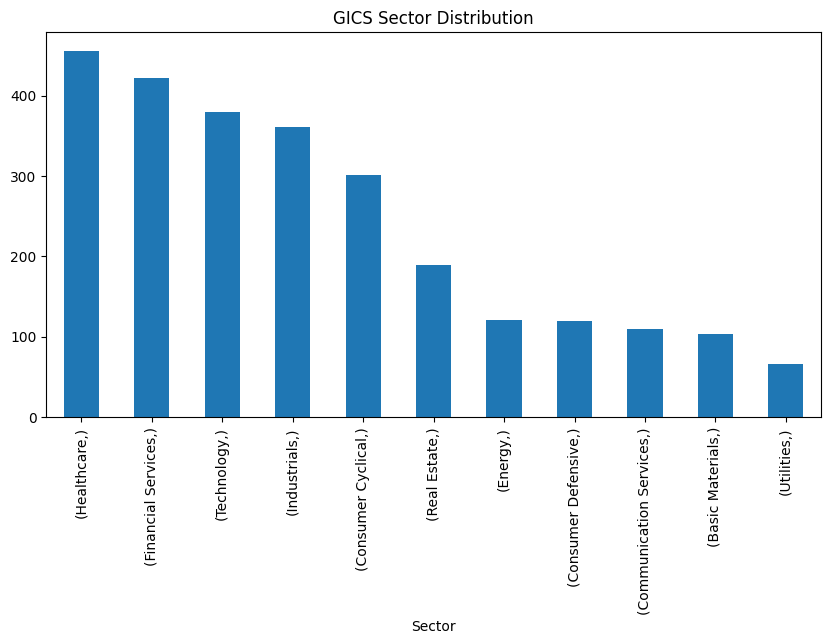

In [67]:
gics_sectors.value_counts().plot(kind='bar', figsize=(10, 5), title="GICS Sector Distribution")

In [68]:
# Reindex gics_sectors to match the order of tickers in daily_prices_pivoted
gics_sectors_aligned = gics_sectors.reindex(daily_prices_pivoted.index)
gics_sectors_aligned

Sector
Ticker                    
A               Healthcare
AA         Basic Materials
AAL            Industrials
AAMI    Financial Services
AAOI            Technology
...                    ...
ZUMZ     Consumer Cyclical
ZVRA            Healthcare
ZWS            Industrials
ZYME            Healthcare
ZYXI            Healthcare

[2102 rows x 1 columns]

In [69]:
gics_sectors_aligned.to_csv("/yunity/arusty/PF-GAP/data/russell3000_gics_sectors.csv", index=True)

In [70]:
daily_prices_pivoted.isnull().any()

3       False
4       False
5       False
6       False
7       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1646, dtype: bool

In [71]:
gics_sectors_aligned[gics_sectors_aligned['Sector'].isnull()].index

Index([], dtype='object', name='Ticker')